In [2]:
# Clustering features - playground to see correlations between different features, etc.


In [3]:
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import torch
print(torch.cuda.is_available())  # in case needed

True


In [4]:
path = "/afs/cern.ch/work/g/gkrzmanc/mlpf_results/cluster_features_GT_clusters/cluster_features"
r = {}
n = 0
#nmax = 257
for file in os.listdir(path):
    n += 1
    #if n > nmax:
    #    break
    f = pickle.load(open(os.path.join(path, file), "rb"))
    for key in f:
        if key not in r:
            r[key] = f[key]
        else:
            r[key] = torch.concatenate((r[key], f[key]), axis=0)

In [5]:
x_names = ["ecal_E", "hcal_E", "num_hits", "track_p", "ecal_dispersion", "hcal_dispersion", "sum_e", "num_tracks"]


In [39]:
data["frac"] = data["sum_e"] / data["e_true"]


In [6]:
r.keys()

dict_keys(['x', 'e_true', 'e_reco', 'true_e_corr'])

In [7]:
data = {}
for i, key in enumerate(x_names):
    data[key] = r["x"][:, i].cpu().numpy()

data["e_true"] = r["e_true"].cpu().numpy()
data["true_e_corr"] = r["true_e_corr"].cpu().numpy()

data.keys()

dict_keys(['ecal_E', 'hcal_E', 'num_hits', 'track_p', 'ecal_dispersion', 'hcal_dispersion', 'sum_e', 'num_tracks', 'e_true', 'true_e_corr'])

In [8]:
len(data["ecal_E"])

121070

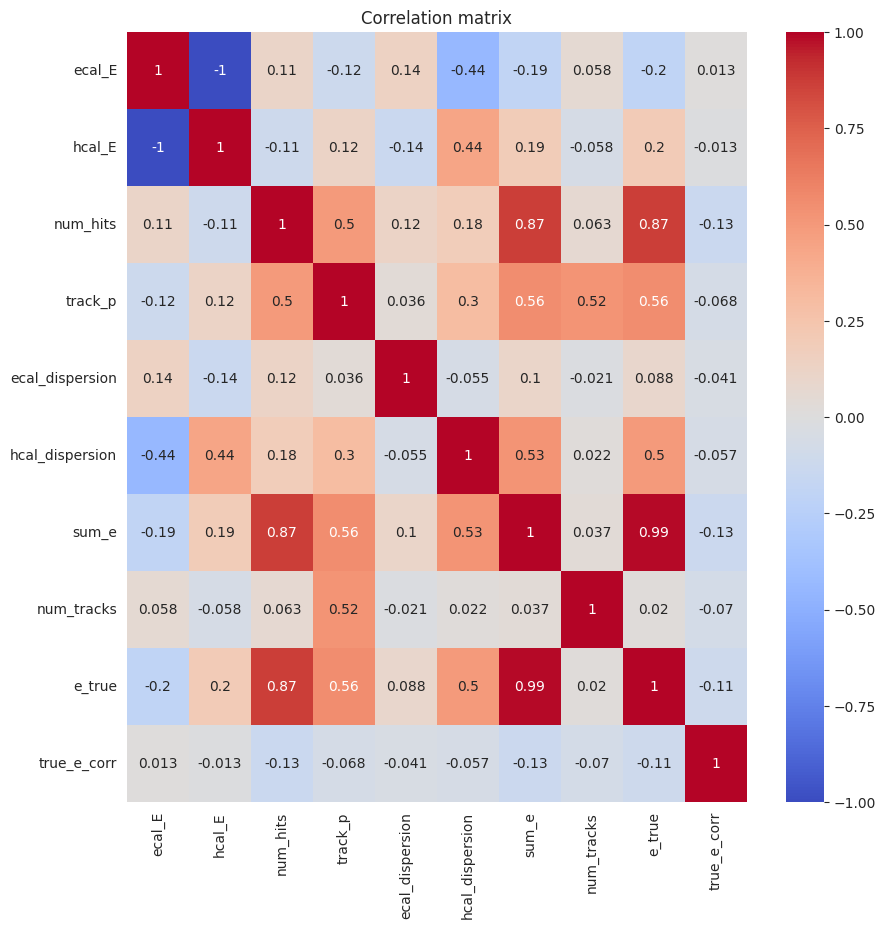

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
# data corr matrix
data_corr = pd.DataFrame(data).corr()
# plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation matrix')
plt.show()


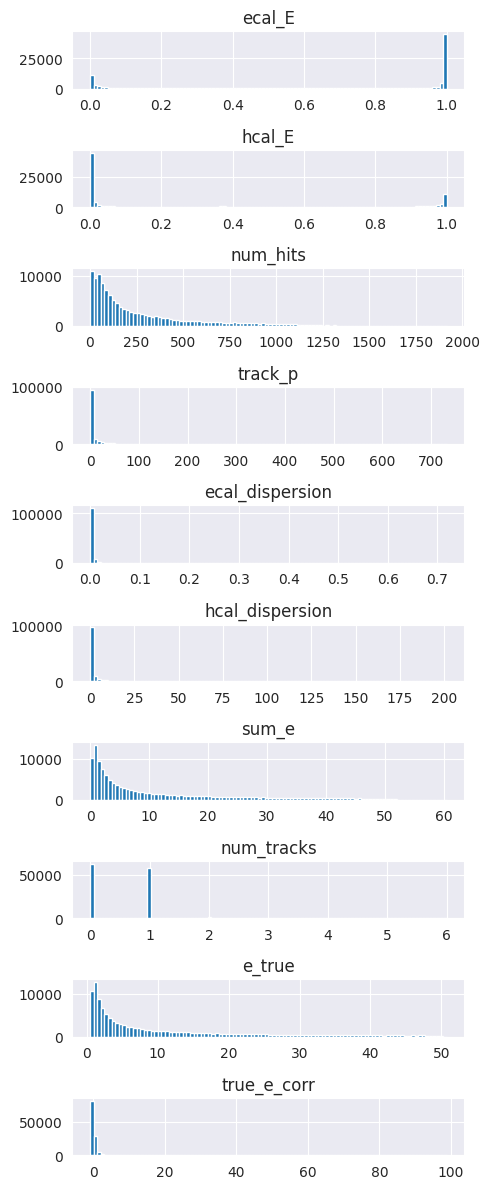

In [10]:
# small histograms for these features
fig, ax = plt.subplots(10, figsize=(5, 12))
for i, key in enumerate(data.keys()):
    ax[i].hist(data[key], bins=100)
    ax[i].set_title(key)

fig.tight_layout()
fig.show()

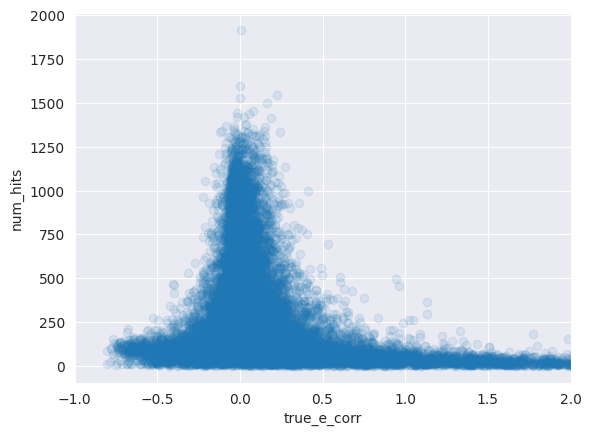

In [11]:
# scatterplot of data["true_e_corr_factor"] and data["num_hits"]
plt.scatter(data["true_e_corr"], data["num_hits"], alpha=0.1)
plt.xlabel("true_e_corr")
plt.xlim([-1, 2])
plt.ylabel("num_hits")
plt.show()


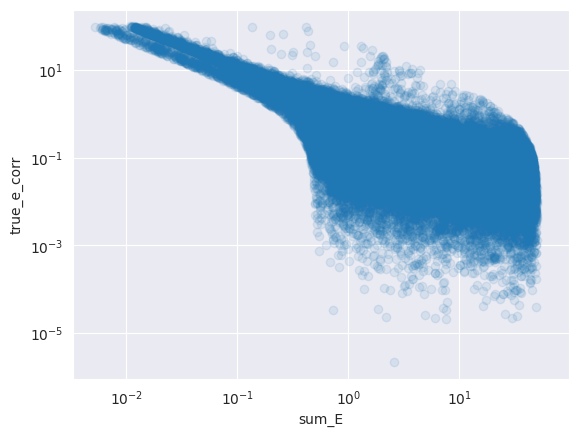

In [25]:
# scatterplot of data["true_e_corr_factor"] and data["num_hits"]
no_tracks_idx = data["num_tracks"] == 0
tracks_idx = data["num_tracks"] == 1

# the same code as below but with no_tracks_idx

#plt.scatter(data["true_e_corr"][no_tracks_idx], data["sum_e"][no_tracks_idx], alpha=0.1, color="purple")
#plt.scatter(data["true_e_corr"][tracks_idx], data["sum_e"][tracks_idx], alpha=0.1, color="yellow")
sum_e = r["x"][:, 6].cpu().numpy()
#plt.scatter(sum_e, r["true_e_corr"], alpha=0.1)
plt.scatter(sum_e, r["true_e_corr"] , alpha=0.1)
plt.ylabel("true_e_corr")
#plt.xlim([-1, 2])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("sum_E")
plt.show()


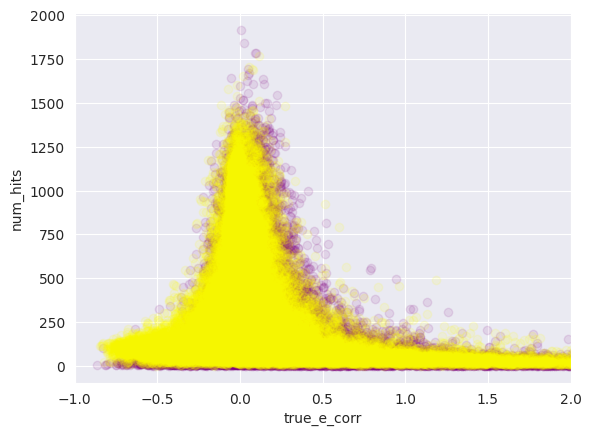

In [11]:
# scatterplot of data["true_e_corr_factor"] and data["num_hits"]
no_tracks_idx = data["num_tracks"] == 0
tracks_idx = data["num_tracks"] == 1

# the same code as below but with no_tracks_idx

plt.scatter(data["true_e_corr"][no_tracks_idx], data["num_hits"][no_tracks_idx], alpha=0.1, color="purple")
plt.scatter(data["true_e_corr"][tracks_idx], data["num_hits"][tracks_idx], alpha=0.1, color="yellow")
plt.xlabel("true_e_corr")
plt.xlim([-1, 2])
plt.ylabel("num_hits")
plt.show()


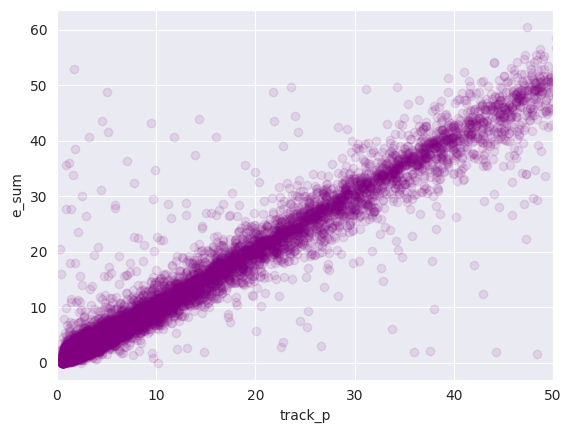

In [13]:
# scatterplot of data["true_e_corr_factor"] and data["num_hits"]
tracks_idx = data["num_tracks"] == 1
# the same code as below but with no_tracks_idx

plt.scatter(data["track_p"][tracks_idx], data["sum_e"][tracks_idx], alpha=0.1, color="purple")
#plt.scatter(data["true_e_corr"][tracks_idx], data["track_p"][tracks_idx], alpha=0.1)
#plt.xlabel("true_e_corr")
plt.xlabel("track_p")
plt.ylabel("e_sum")
plt.xlim([0, 50])

plt.show()
#plt.ylabel("track p")
#plt.show()


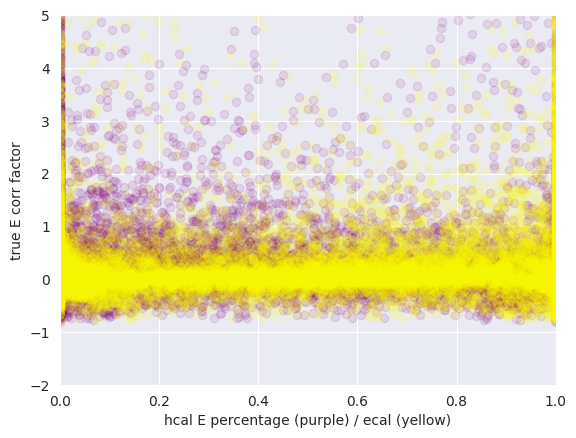

In [39]:
# scatterplot of data["true_e_corr_factor"] and data["num_hits"]
# the same code as below but with no_tracks_idx

plt.scatter(data["hcal_E"], data["true_e_corr"], alpha=0.1, color="purple")
plt.scatter(data["ecal_E"], data["true_e_corr"], alpha=0.1, color="yellow")

#plt.scatter(data["true_e_corr"][tracks_idx], data["track_p"][tracks_idx], alpha=0.1)
#plt.xlabel("true_e_corr")
plt.xlabel("hcal E percentage (purple) / ecal (yellow)")
plt.ylabel("true E corr factor")
plt.xlim([0, 1])
plt.ylim([-2, 5.0])
plt.show()


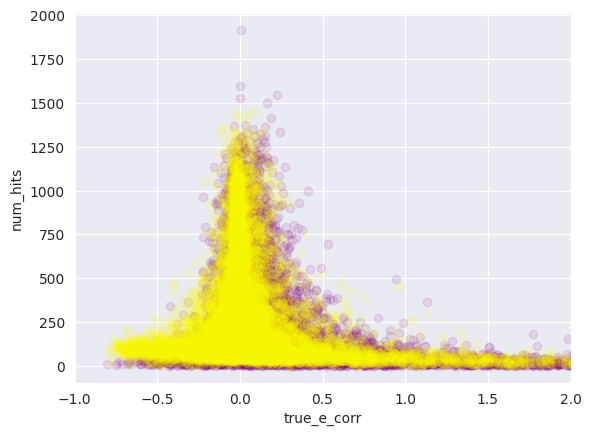

In [40]:
plt.scatter(data["true_e_corr"][no_tracks_idx], data["num_hits"][no_tracks_idx], alpha=0.1, color="purple")
plt.scatter(data["true_e_corr"][tracks_idx], data["num_hits"][tracks_idx], alpha=0.1, color="yellow")
plt.xlabel("true_e_corr")
plt.xlim([-1, 2])
plt.ylabel("num_hits")
plt.show()



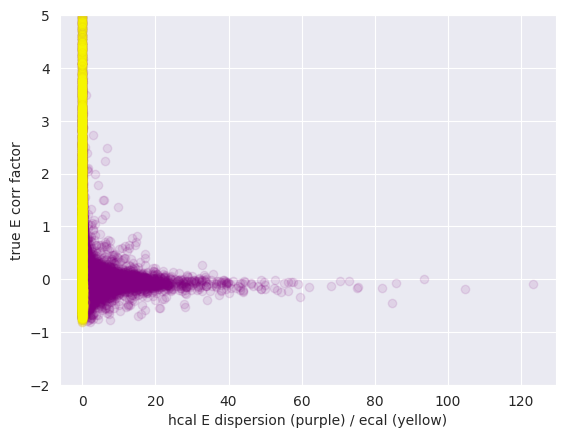

In [41]:
# scatterplot of data["true_e_corr_factor"] and data["num_hits"]
# the same code as below but with no_tracks_idx

plt.scatter(data["hcal_dispersion"], data["true_e_corr"], alpha=0.1, color="purple")
plt.scatter(data["ecal_dispersion"], data["true_e_corr"], alpha=0.1, color="yellow")

#plt.scatter(data["true_e_corr"][tracks_idx], data["track_p"][tracks_idx], alpha=0.1)
#plt.xlabel("true_e_corr")
plt.xlabel("hcal E dispersion (purple) / ecal (yellow)")
plt.ylabel("true E corr factor")
#plt.xlim([0, 1])
plt.ylim([-2, 5.0])
plt.show()


In [102]:
# regress using a simple NN r["true_e_corr"] using r["x"]
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np

tensor(-0.8057)

In [185]:

# split the data
x = r["x"].cpu().numpy()
print(x.shape)
y = r["true_e_corr"].cpu().numpy()
x_train, x_test, y_train, y_test, x_energies_true, x_energies_test = train_test_split(x, y, r["e_true"].cpu().numpy(), test_size=0.2, random_state=42)


(24781, 8)


In [210]:

# create a simple NN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # add batchnorm?
        
        self.nn = nn.ModuleList([
            #nn.BatchNorm1d(8),
            nn.Linear(8, 16),
            nn.LeakyReLU(negative_slope=0.2),
            #nn.BatchNorm1d(16),
            nn.Linear(16, 16),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Linear(16,16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Linear(16, 1)
        ])
            
    def forward(self, x):
        for module in self.nn:
            x = module(x)
        return x
    

In [211]:
# create a dataset and a dataloader
train_dataset = TensorDataset(torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32), torch.tensor(x_energies_true, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32), torch.tensor(x_energies_test, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

/tmp/gkrzmanc/ipykernel_12310/2019892255.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = TensorDataset(torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32), torch.tensor(x_energies_test, dtype=torch.float32))


In [212]:
# create a model, loss function and optimizer
model = Net()
def criterion(yp, yt, energy):
    a = torch.mean((yp - yt)**2 * energy)
    return a
optimizer = optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
print(device)

cuda:0


/tmp/gkrzmanc/ipykernel_12310/3107839152.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = criterion(output, torch.log10(y+1), torch.tensor(xen).to(device))


Epoch 1/100
Epoch 1/100, Loss: 0.028977015987038612
Epoch 2/100, Loss: 0.028918778523802757
Epoch 3/100, Loss: 0.028907399624586105
Epoch 4/100, Loss: 0.02890073135495186
Epoch 5/100, Loss: 0.028879957273602486
Epoch 6/100, Loss: 0.028866425156593323
Epoch 7/100, Loss: 0.028887122869491577
Epoch 8/100, Loss: 0.028909198939800262
Epoch 9/100, Loss: 0.028983181342482567
Epoch 10/100, Loss: 0.02879992127418518
Epoch 11/100
Epoch 11/100, Loss: 0.028700418770313263
Epoch 12/100, Loss: 0.029092583805322647
Epoch 13/100, Loss: 0.028937626630067825
Epoch 14/100, Loss: 0.028862863779067993
Epoch 15/100, Loss: 0.028797978535294533
Epoch 16/100, Loss: 0.028925582766532898
Epoch 17/100, Loss: 0.02877195179462433
Epoch 18/100, Loss: 0.028910282999277115
Epoch 19/100, Loss: 0.028817350044846535
Epoch 20/100, Loss: 0.028965938836336136
Epoch 21/100
Epoch 21/100, Loss: 0.02907594107091427
Epoch 22/100, Loss: 0.029043052345514297
Epoch 23/100, Loss: 0.029178623110055923
Epoch 24/100, Loss: 0.0293451175


KeyboardInterrupt



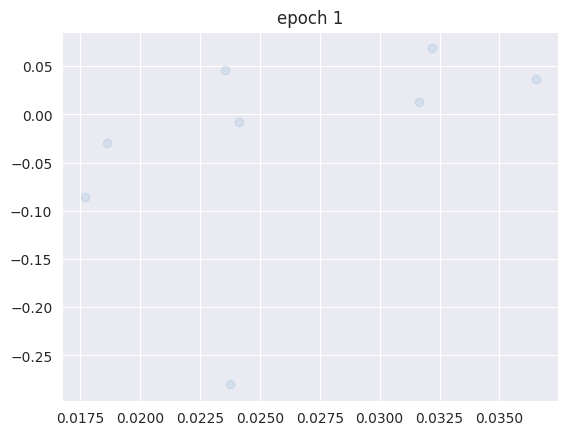

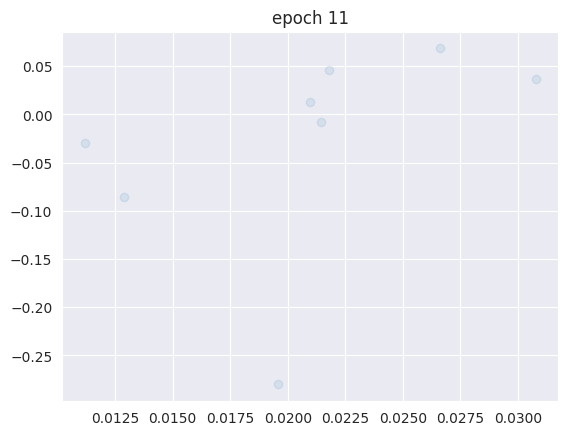

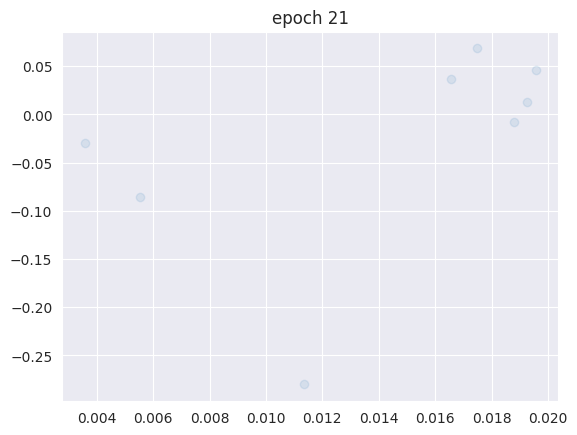

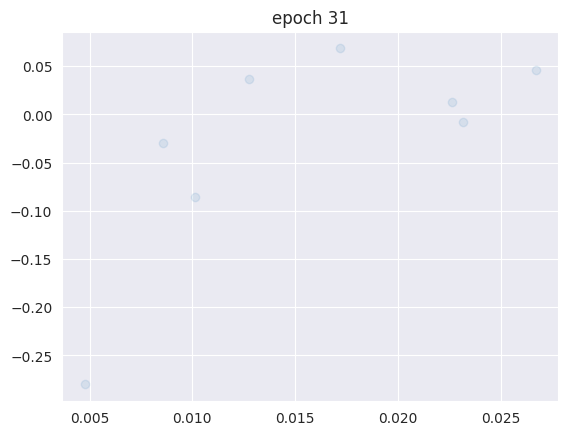

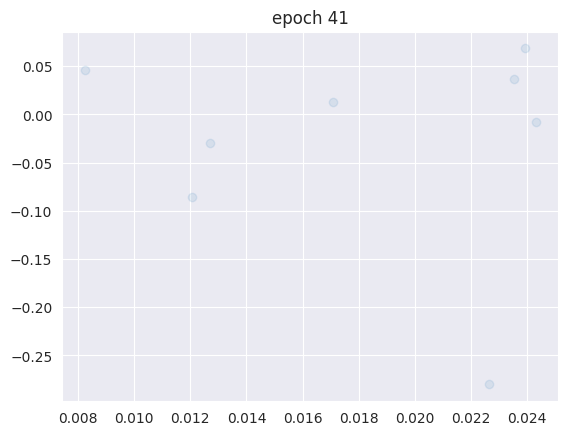

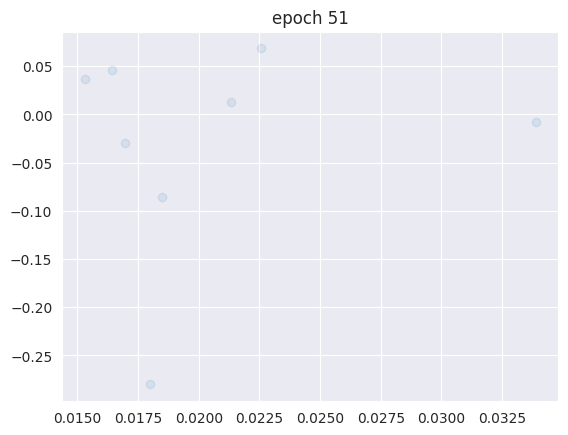

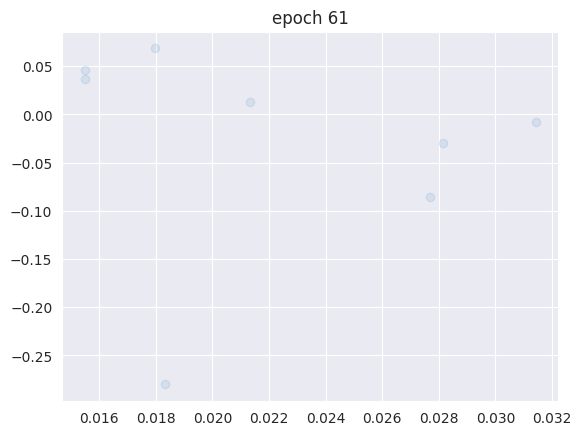

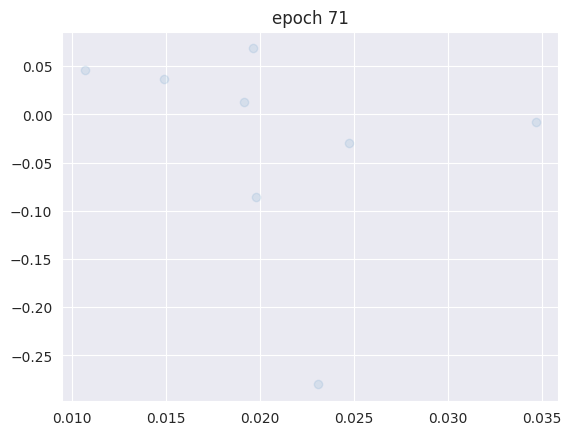

In [213]:
# train the model
n_epochs = 100
for epoch in range(n_epochs):
    
    model.train()
    for x, y, xen in train_loader:
        optimizer.zero_grad()
        x, y = x.to(device), y.to(device)
        output = model(x)
        loss = criterion(output, torch.log10(y+1), torch.tensor(xen).to(device))
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}")
        fig, ax = plt.subplots()
        ax.scatter(output.detach().cpu().flatten(), torch.log10(y+1).detach().cpu().flatten(), alpha=0.1)
        ax.set_title("epoch "+str(epoch+1))
        fig.show()
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}")


In [214]:
# eval the model
model.eval()
with torch.no_grad():
    # move to device
    x_test, y_test = torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)
    # batch norm?
    x_test, y_test = x_test.to(device), y_test.to(device)
    y_pred = model(torch.tensor(x_test, dtype=torch.float32))
    #loss = criterion(y_pred, torch.tensor(torch.log10(y_test+1), dtype=torch.float32))
    #print(f"Loss: {loss.item()}")


/tmp/gkrzmanc/ipykernel_12310/3059814728.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test, y_test = torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)
/tmp/gkrzmanc/ipykernel_12310/3059814728.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = model(torch.tensor(x_test, dtype=torch.float32))


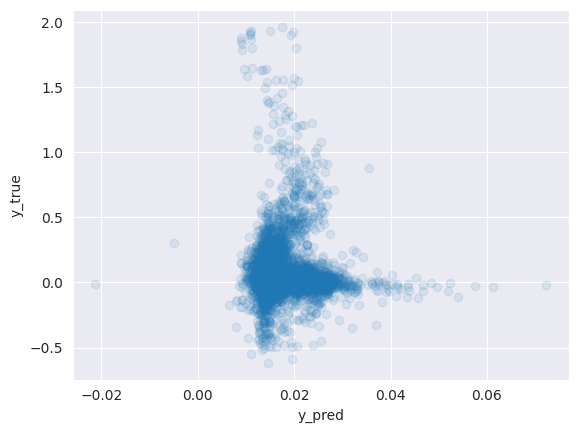

In [215]:
# scatterplot y_pred and y_test
plt.scatter(y_pred.detach().cpu(), torch.log10(1+y_test).detach().cpu(), alpha=0.1)
plt.xlabel("y_pred")
plt.ylabel("y_true")
#plt.yscale("log")
#plt.xscale("log")
plt.show()

In [127]:
y_test.min()

tensor(-0.7584, device='cuda:0')

tracks+hits 0.762103958744833
tracks 0.5593593580828741
hits 0.7913588075403916


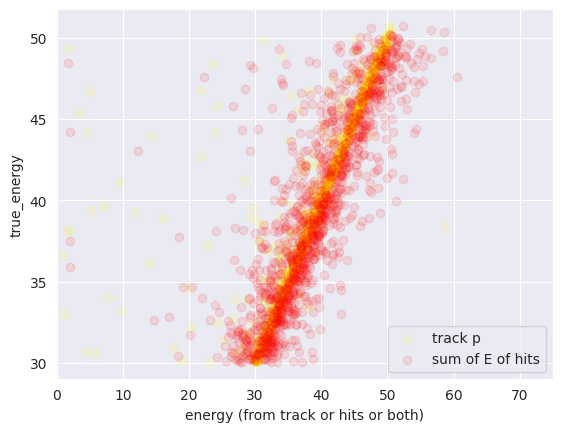

In [45]:
# scatterplot of data["true_e_corr_factor"] and data["num_hits"]
tracks_idx = (data["num_tracks"] == 1) & (data["e_true"] > 30)
# the same code as below but with no_tracks_idx

avg_energy = (data["sum_e"][tracks_idx] + data["track_p"][tracks_idx]) / 2
track_p_energy = data["track_p"][tracks_idx]
true_energy = data["e_true"][tracks_idx]
# correl. coeff.
print("tracks+hits", np.corrcoef(avg_energy, true_energy)[0,1])
print("tracks", np.corrcoef(track_p_energy, true_energy)[0,1])
print("hits", np.corrcoef(data["sum_e"][tracks_idx], true_energy)[0,1])

# now do a scatterplot of those
#plt.scatter(avg_energy, true_energy, alpha=0.1, color="purple")
plt.scatter(track_p_energy, true_energy, alpha=0.1, color="yellow", label="track p")
plt.scatter(data["sum_e"][tracks_idx], true_energy, alpha=0.1, color="red", label="sum of E of hits")
plt.legend()
plt.xlabel("energy (from track or hits or both)")
plt.ylabel("true_energy")
plt.xlim([0, 75])
plt.show()


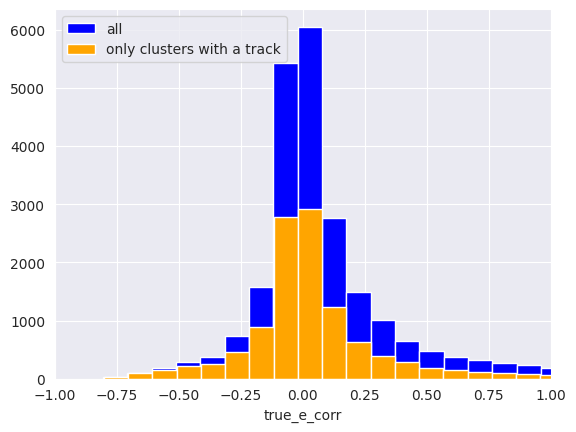

In [47]:
# distribution of energy corr factor
plt.hist(data["true_e_corr"], bins=1000, color="blue", label="all")
plt.hist(data["true_e_corr"][data["num_tracks"] == 1], bins=1000, color="orange", label="only clusters with a track")
plt.xlabel("true_e_corr")
plt.xlim([-1,1])
plt.legend()
plt.show()

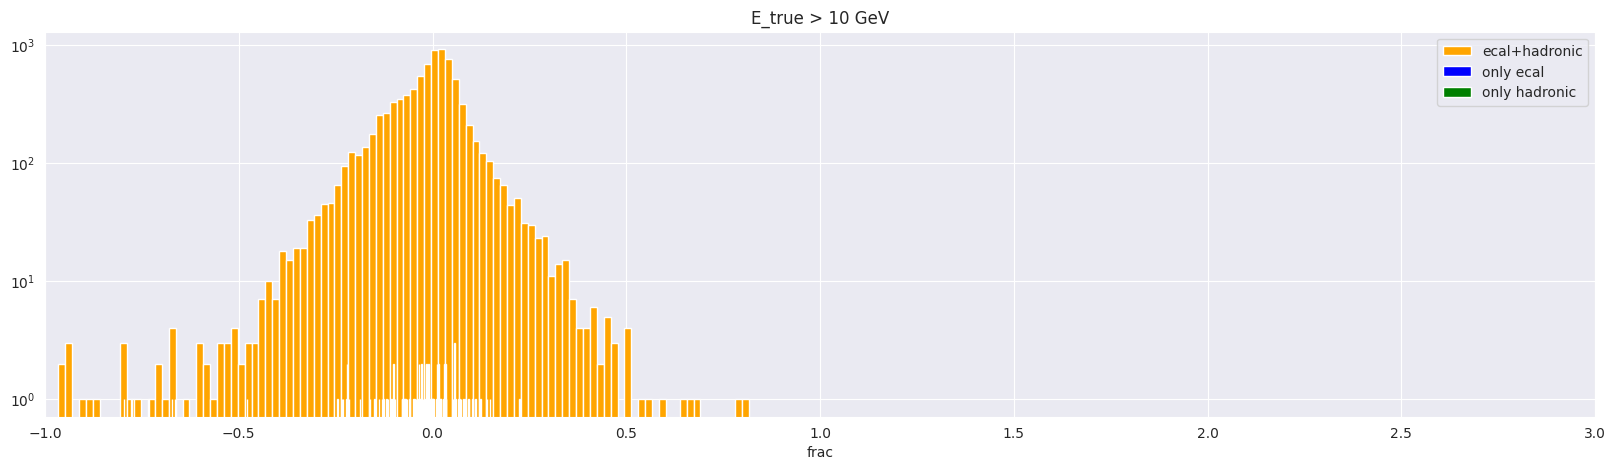

In [42]:
# distribution of energy corr factor
e_threshold = 10
filt_energy = data["e_true"] > e_threshold
# set fig size
plt.figure(figsize=(20, 5))
plt.hist(data["frac"][(data["ecal_E"] < 1.0) & filt_energy], bins=100, color="orange", label="ecal+hadronic")
plt.hist(data["frac"][(data["ecal_E"] == 1.0) & filt_energy], bins=100, color="blue", label="only ecal")
# only hadronic
plt.hist(data["frac"][(data["ecal_E"] < 1.0) & filt_energy & (data["hcal_E"] == 1.0)], bins=1000, color="green", label="only hadronic")
plt.xlabel("frac")
plt.xlim([-1,3])
plt.title(f"E_true > {e_threshold} GeV")
plt.yscale("log")
plt.legend()
plt.show()

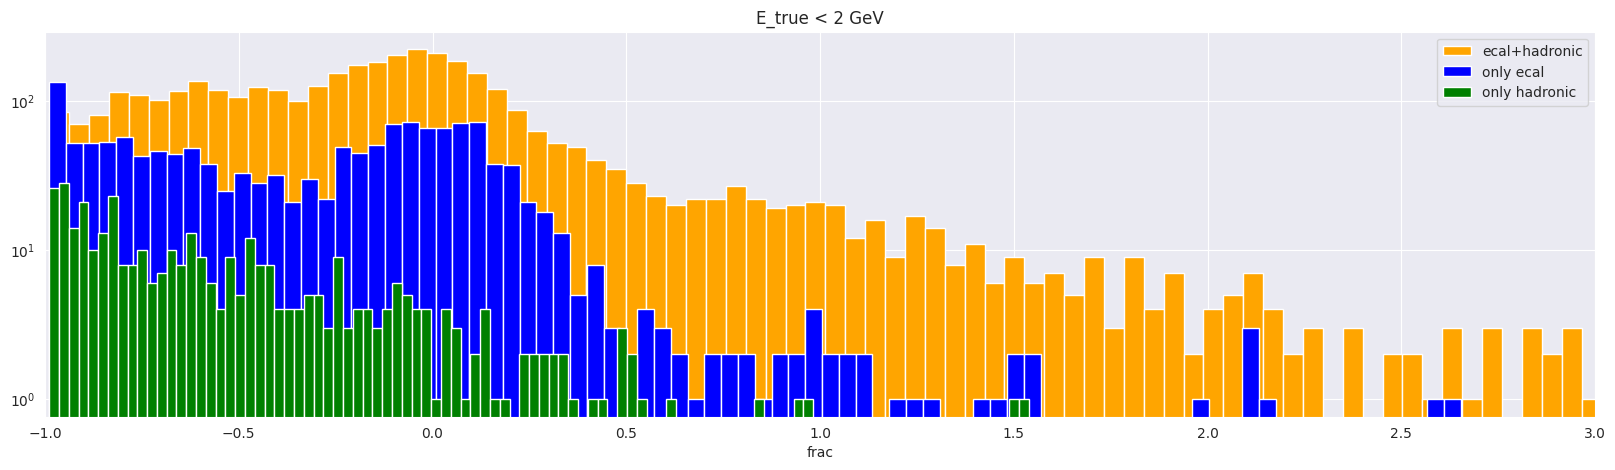

In [45]:
# distribution of energy corr factor
filt_energy = data["e_true"] <= 2
# set fig size
plt.figure(figsize=(20, 5))
plt.hist(data["frac"][(data["ecal_E"] < 1.0) & filt_energy], bins=100, color="orange", label="ecal+hadronic")
plt.hist(data["frac"][(data["ecal_E"] == 1.0) & filt_energy], bins=100, color="blue", label="only ecal")
# only hadronic
plt.hist(data["frac"][(data["ecal_E"] < 1.0) & filt_energy & (data["hcal_E"] == 1.0)], bins=100, color="green", label="only hadronic")
plt.xlabel("frac")
plt.xlim([-1,3])
plt.title("E_true < 2 GeV")
# log x axis
plt.yscale("log")

plt.legend()
plt.show()

In [71]:
import numpy as np
def get_std68(theHist, bin_edges, percentage=0.683, epsilon=0.01):
    # theHist, bin_edges = np.histogram(data_for_hist, bins=bins, density=True)
    wmin = 0.2
    wmax = 1.0

    weight = 0.0
    points = []
    sums = []

    # fill list of bin centers and the integral up to those point
    for i in range(len(bin_edges) - 1):
        weight += theHist[i] * (bin_edges[i + 1] - bin_edges[i])
        points.append([(bin_edges[i + 1] + bin_edges[i]) / 2, weight])
        sums.append(weight)
    low = wmin
    high = wmax
    width = 100
    for i in range(len(points)):
        for j in range(i, len(points)):
            wy = points[j][1] - points[i][1]
            if abs(wy - percentage) < epsilon:
                wx = points[j][0] - points[i][0]
                if wx < width:
                    low = points[i][0]
                    high = points[j][0]
                    width = wx
                    # ii = i
                    # jj = j

    return 0.5 * (high - low), low, high

def obtain_MPV_and_68(data_for_hist, bins_per_binned_E=np.arange(-1, 5, 0.01), epsilon=0.01):
    hist, bin_edges = np.histogram(data_for_hist, bins=bins_per_binned_E, density=True)
    ind_max_hist = np.argmax(hist)
    MPV = (bin_edges[ind_max_hist] + bin_edges[ind_max_hist + 1]) / 2
    std68, low, high = get_std68(hist, bin_edges, epsilon=epsilon)
    return MPV, std68


MPV: 0.775, 68%: 0.3499999999999999
MPV: 1.0750000000000002, 68%: 0.7249999999999999
MPV: 2.125, 68%: 0.875
MPV: 3.575, 68%: 0.9749999999999996
MPV: 4.325, 68%: 1.0249999999999997
MPV: 5.725, 68%: 1.9999999999999991
MPV: 11.225000000000001, 68%: 2.1499999999999995
MPV: 16.525, 68%: 2.4499999999999993
MPV: 22.125, 68%: 2.474999999999998
MPV: 27.475, 68%: 2.6750000000000007
MPV: 32.175, 68%: 2.9250000000000007
MPV: 36.975, 68%: 2.7749999999999986


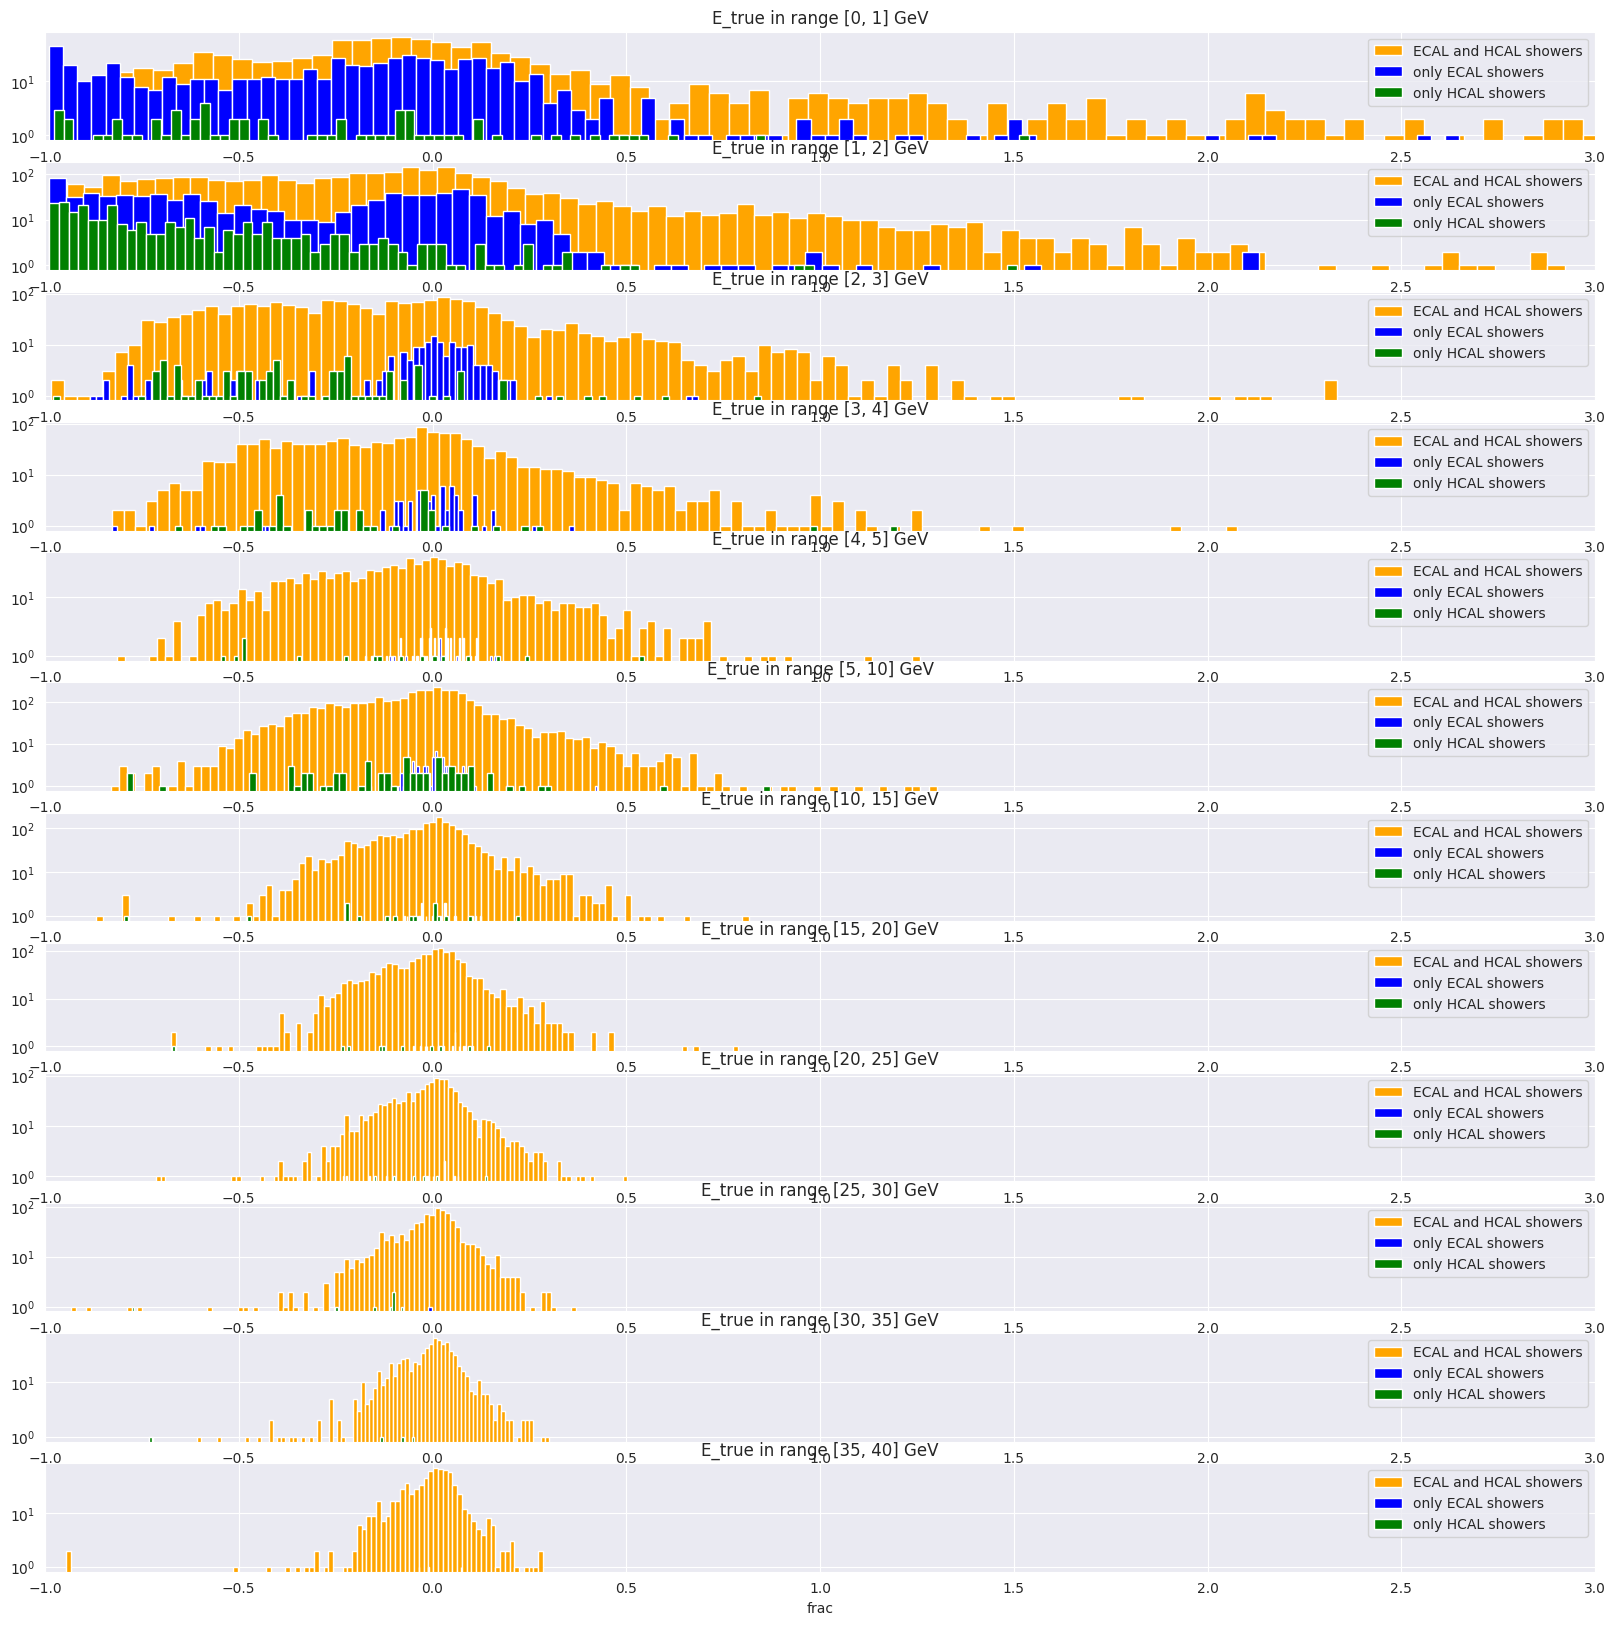

In [96]:
# Now do histograms for different energy bins: 1-2 GeV, 2-5 GeV, 5-10 GeV, 10+ GeV
# distribution of energy corr factor
e_thresholds = [0, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
# set fig size
mpvs, s68s = [], []
mpvs_hcal, s68s_hcal = [], []
mpvs_ecal, s68s_ecal = [], []
fig, ax = plt.subplots(len(e_thresholds) - 1, figsize=(20, 20))
for i, e_threshold in enumerate(e_thresholds):
    if i == 0:
        continue
    filt_energy = (data["e_true"] < e_thresholds[i]) & (data["e_true"] >= e_thresholds[i-1])
    ax[i-1].hist(data["frac"][(data["ecal_E"] < 1.0) & filt_energy], bins=100, color="orange", label="ECAL and HCAL showers")
    ax[i-1].hist(data["frac"][(data["ecal_E"] == 1.0) & filt_energy], bins=100, color="blue", label="only ECAL showers")
    mpv, s68 = obtain_MPV_and_68(data["sum_e"][filt_energy], bins_per_binned_E=np.arange(0, 2.5*e_thresholds[i], 0.05))
    # now with filt ecalE and hcalE
    #mpvs.append(1/2 * (e_thresholds[i] + e_thresholds[i-1]))
    mpvs.append(mpv)
    s68s.append(s68)
    print(f"MPV: {mpv}, 68%: {s68}")
    # only hadronic
    ax[i-1].hist(data["frac"][(data["ecal_E"] < 1.0) & filt_energy & (data["hcal_E"] == 1.0)], bins=100, color="green", label="only HCAL showers")
    ax[i-1].set_xlabel("frac")
    ax[i-1].set_xlim([-1,3])
    ax[i-1].set_title(f"E_true in range [{e_thresholds[i-1]}, {e_thresholds[i]}] GeV")
    # log x axis
    ax[i-1].set_yscale("log")
    ax[i-1].legend()
fig.show()

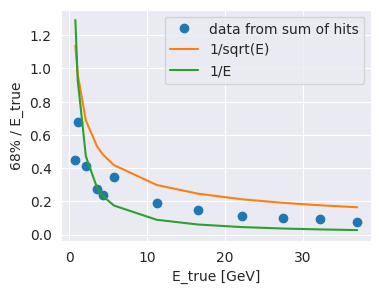

In [98]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(mpvs, np.array(s68s) / np.array(mpvs), "o", label="data from sum of hits")
ax.plot(np.array(mpvs), np.sqrt(np.array(mpvs)) / np.array(mpvs), label="1/sqrt(E)")
# one over E
ax.plot(np.array(mpvs), 1/np.array(mpvs), label="1/E")
ax.legend()
ax.set_xlabel("E_true [GeV]")
ax.set_ylabel("68% / E_true")
fig.show()


In [198]:
#  Model just for energy regression + weighted loss based on energy #
# create a model, loss function and optimizer
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
print(device)
# train the model
n_epochs = 100
for epoch in range(n_epochs):
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        x, y = x.to(device), y.to(device)
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")
# eval the model
model.eval()
with torch.no_grad():
    # move to device
    x_test, y_test = torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)
    x_test, y_test = x_test.to(device), y_test.to(device)
    y_pred = model(torch.tensor(x_test, dtype=torch.float32))
    loss = criterion(y_pred, torch.tensor(y_test, dtype=torch.float32))
    print(f"Loss: {loss.item()}")

# scatterplot y_pred and y_test
plt.scatter(y_pred.detach().cpu(), y_test.detach().cpu(), alpha=0.1)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
# scatterplot of data["true_e_corr_factor"] and data["num_hits"]
tracks_idx = data["num_tracks"] == 1
# the same code as below but with no_tracks_idx

avg_energy = (data["sum_e"][tracks_idx] + data["track_p"][tracks_idx]) / 2
track_p_energy = data["track_p"][tracks_idx]
true_energy = data["e_true"][tracks_idx]
# correl. coeff.
print("tracks+hits", np.corrcoef(avg_energy, true_energy)[0, 1])
print("tracks", np.corrcoef(track_p_energy, true_energy)[0, 1])
print("hits", np.corrcoef(data["sum_e"][tracks_idx], true_energy)[0, 1])
# now do a scatterplot of those
plt.scatter(avg_energy, true_energy, alpha=0.1, color="purple")
plt.scatter(track_p_energy, true_energy, alpha=0.1, color="yellow")
plt.scatter(data["sum_e"][tracks_idx], true_energy, alpha=0.1, color="green")
plt.xlabel("energy (from track or hits or both)")
plt.ylabel("true_energy")
plt.show()

cuda:0
Epoch 1/100, Loss: 0.8779515027999878
Epoch 2/100, Loss: 3.501530170440674
Epoch 3/100, Loss: 1.4194138050079346
Epoch 4/100, Loss: 0.5639323592185974
Epoch 5/100, Loss: 0.0684133917093277
Epoch 6/100, Loss: 0.6226361393928528


KeyboardInterrupt: 

dict_keys(['ecal_E', 'hcal_E', 'num_hits', 'track_p', 'ecal_dispersion', 'hcal_dispersion', 'sum_e', 'num_tracks', 'e_true', 'true_e_corr'])

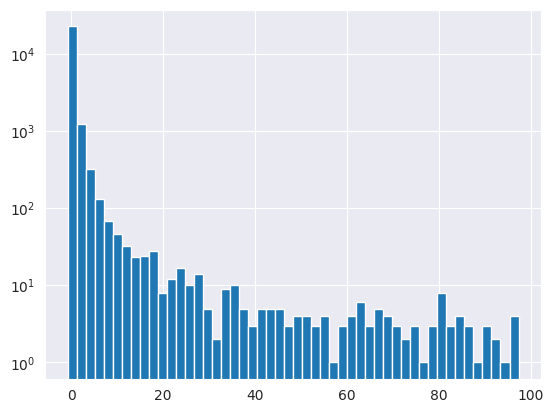

In [119]:
plt.hist(data["true_e_corr"], bins=50)
plt.yscale("log")
plt.show()